In [1]:
import matplotlib.pyplot
import numpy
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

In [2]:
n = 3
s = '010'

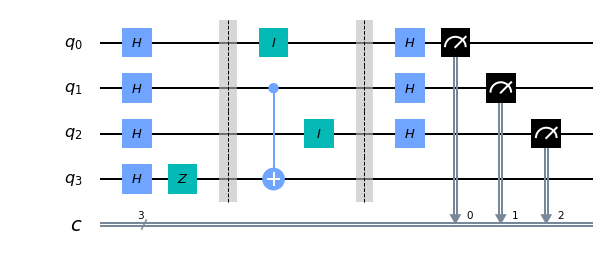

In [3]:
bv_circuit = QuantumCircuit(n+1, n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)
    
bv_circuit.barrier()

s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output='mpl')

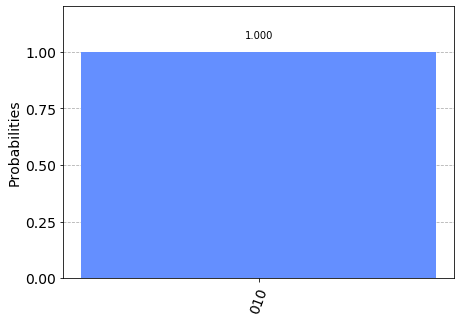

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(bv_circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
qcomp = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("Least Busy Backend: ", qcomp)

Least Busy Backend:  ibmq_ourense


In [ ]:
from qiskit.tools.monitor import job_monitor
job = execute(bv_circuit, backend=qcomp, shots=1024)
job_monitor(job, interval = 2)

Job Status: job is actively running

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)